<hr><font color="green"><h1>from file: 03_03_PCA_for_Data_Visualization</h1></font>

Are all the features in your dataset needed? Say a you have some flowers and you measured their petal length. If you have a column of that measurement in centimeters and another column with the measurement in inches, do you need both columns? In that circumstance, you can probably drop either column without losing information. In other cases, dropping a column could lead to issues. Principal component analysis, better known as PCA, is a technique that you can use to smartly reduce the dimensionality of your dataset while losing the least amount of information possible. One use of PCA is for data visualization. In this video, I'll share with you how you can use PCA to help visualize your data. 

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
speciesDict = {0: 'setosa', 1:'versicolor', 2:'virginica'}

df.loc[:,'target'] = df.loc[:, 'target'].apply(lambda x: speciesDict[x])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Standardize the Data
PCA is effected by scale so you need to scale the features in the data before using PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the datasetâ€™s features. 

In [5]:
# Apply Standardization to features matrix X
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [6]:
x = StandardScaler().fit_transform(x)

## PCA Projection to 2D
The original data has 4 columns (sepal length, sepal width, petal length, and petal width). The code below projects the original data which is 4 dimensional into 2 dimensions. Note that after dimensionality reduction, there usually isnâ€™t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [7]:
# Make an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

## Visualize 2D Projection
PCA projection to 2D to visualize the entire data set. 

In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

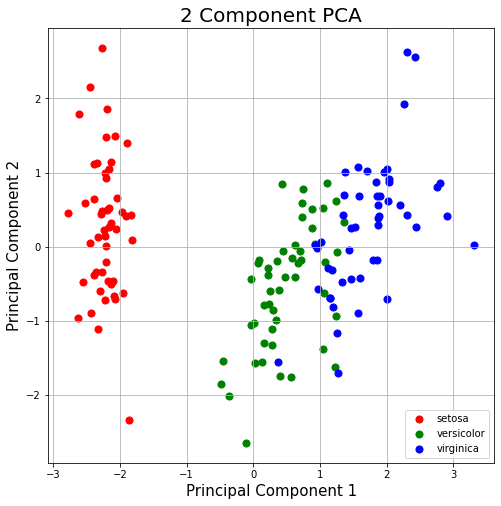

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df.loc[:, 'target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

From the graph, it looks like the setosa class is well separated from the versicolor and virginica classes.

## Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this.

In [10]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [11]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

Together, the two principal components contain about 96% of the information. The first principal component contains about 73% of the variance. The second principal component contains about 23% of the variance. 

So that's it, PCA can be used to help visualize your data.

<hr><font color="green"><h1>from file: 03_04_PCA_to_Speed_Up_Machine_Learning</h1></font>

Do you want to speed up the fitting of your machine learning algorithm? Scikit-learn offers  quite a few ways to do this. One way is to train your model in parallel using the n_jobs parameter which exists for many scikit-learn models. A really simple way is to reduce the number of rows or columns in your data. The problem with this approach is that its hard to know which rows and especially which columns to remove.  Principal component analysis, commonly known as PCA, is a technique that you can use to smartly reduce the dimensionality of your dataset while losing the least amount of information possible.  In this video, I'll share with you the process of how you can use principal component analysis to speed up the fitting of a logistic regression model. 

## Import Libraries

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

For convenience, I have arranged the data into csv file.

In [13]:
df = pd.read_csv('data/MNISTonly0_1.csv')

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Visualize Each Digit

In [15]:
pixel_colnames = df.columns[:-1]

In [16]:
# Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

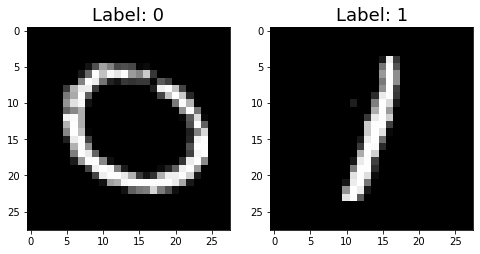

In [17]:
plt.figure(figsize=(8,4))
for index in range(0, 2):

    plt.subplot(1, 2, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label), fontsize = 18)

## Splitting Data into Training and Test Sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)

## Standardize the Data
PCA and logisitic regression are sensitive to the scale of your features. You can standardize your data onto unit scale (mean = 0 and variance = 1) by using Scikit-Learn's `StandardScaler`. 

In [19]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Variable created for demonstational purposes in the notebook
scaledTrainImages = X_train.copy()

## PCA then Logistic Regression

In [21]:
"""
n_components = .90 means that scikit-learn will choose the minimum number 
of principal components such that 90% of the variance is retained.
"""

pca = PCA(n_components = .90)

# Fit PCA on training set only
pca.fit(X_train)

# Apply the mapping (transform) to both the training set and the test set. 
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Number of dimensions before PCA: ' + str(len(pixel_colnames)))
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(clf.score(X_test, y_test)))

Number of dimensions before PCA: 784
Number of dimensions after PCA: 104
Classification accuracy: 0.997


## Relationship between Cumulative Explained Variance and Number of Principal Components

Don't worry if you don't understand the code in this section. It is to show the level of redundancy present in multiple dimensions.

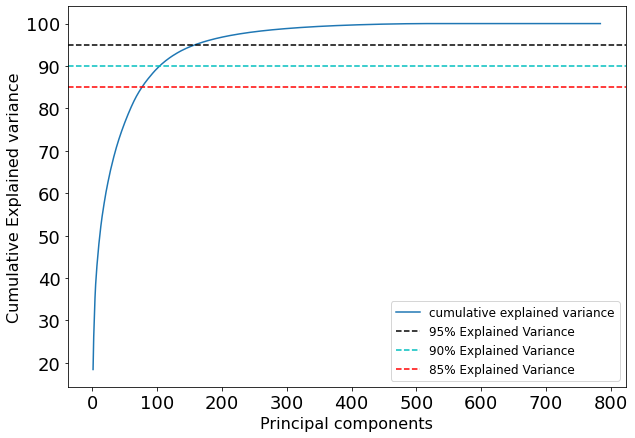

In [22]:
# if n_components is not set, all components are kept (784 in this case)
pca = PCA()

pca.fit(scaledTrainImages)

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 785), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

So that's it, PCA can be used to speed up the fitting of your algorithm. 

<hr><font color="green"><h1>from file: 03_05_Pipelines</h1></font>

Machine learning is not always about applying a single machine learning algorithm. For a lot of machine learning applications, you will need to apply various data processing steps, data transformations, and potentially multiple machine learning algorithms. This can lead to a lot of code. The question becomes, how do you keep your code organized and as bug free as possible? In this video, I'll share with you how can use pipelines in scikit-learn to make your code cleaner and more resilient to bugs. 

To demonstrate the utility of pipelines, this notebook shows how much less code you need to chain together pca and logistic regression for image classification.

## Import Libraries

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Load the Dataset
The dataset is a modified version of the MNIST dataset that contains 2000 labeled images of each digit 0 and 1. The images are 28 pixels by 28 pixels. 

Parameters | Number
--- | ---
Classes | 2 (digits 0 and 1)
Samples per class | 2000 samples per class
Samples total | 4000
Dimensionality | 784 (28 x 28 images)
Features | integers values from 0 to 255

For convenience, I have arranged the data into csv file.

In [24]:
df = pd.read_csv('data/MNISTonly0_1.csv')

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Without Pipeline
Notice how many steps this takes. There are quite a few places where an error could occur. 

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['label'], random_state=0)

# Standardize Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components = .90, random_state=0)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Apply Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Get Model Performance
print(clf.score(X_test, y_test))

0.997


## With Pipelines

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['label'], random_state=0)

# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components = .90, random_state=0)),
                 ('logistic', LogisticRegression())])

pipe.fit(X_train, y_train)

# Get Model Performance
print(pipe.score(X_test, y_test))

0.997


## Visualize Pipeline

In [28]:
from sklearn import set_config

set_config(display='diagram')
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=0)),
                ('logistic', LogisticRegression())])

So that's it, pipelines can make your code more organized and easier to understand. 